In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv("a.csv")

In [3]:
df

,age,gender,calorie
0,2,M,1000
1,3,M,1400
2,4,M,1400
3,5,M,1400
4,6,M,1600
5,7,M,1600
6,8,M,1600
7,9,M,1800
8,10,M,1800
9,11,M,2000


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
female = df[df.gender == 'F']
male = df[df.gender== 'M']

In [6]:
male

,age,gender,calorie
0,2,M,1000
1,3,M,1400
2,4,M,1400
3,5,M,1400
4,6,M,1600
5,7,M,1600
6,8,M,1600
7,9,M,1800
8,10,M,1800
9,11,M,2000


In [7]:
female

,age,gender,calorie
30,2,F,1000
31,3,F,1200
32,4,F,1400
33,5,F,1400
34,6,F,1400
35,7,F,1600
36,8,F,1600
37,9,F,1600
38,10,F,1800
39,11,F,1800


In [10]:
from matplotlib import pyplot as plt

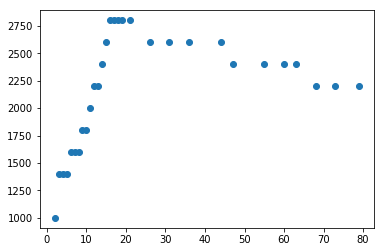

In [11]:
plt.scatter(male.age,male.calorie)

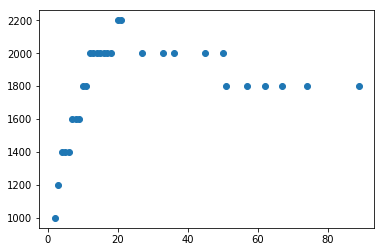

In [12]:
plt.scatter(female.age,female.calorie)

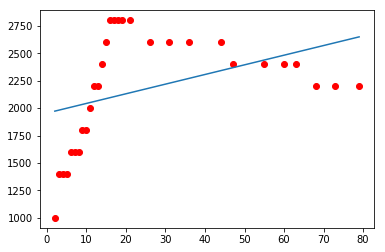

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
linear1=LinearRegression()
X_male = male.iloc[:,0:1].values
linear1.fit(X_male,male.calorie)
plt.scatter(X_male,male.calorie,color = 'red')
plt.plot(X_male,linear1.predict(X_male))

In [35]:
polyreg=PolynomialFeatures(degree=3)
X_male = male.iloc[:,0:1].values
X_male

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [21],
       [26],
       [31],
       [36],
       [44],
       [47],
       [55],
       [60],
       [63],
       [68],
       [73],
       [79]], dtype=int64)

In [36]:
X_female = female.iloc[:,0:1].values
X_female

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [20],
       [21],
       [27],
       [33],
       [36],
       [45],
       [50],
       [51],
       [57],
       [62],
       [67],
       [74],
       [89]], dtype=int64)

In [37]:
Xmale_poly = polyreg.fit_transform(X_male)
Xfemale_poly = polyreg.fit_transform(X_female)

In [38]:
linearregmale=linear_model.LinearRegression()
linearregfemale=linear_model.LinearRegression()

In [39]:
linearregmale.fit(Xmale_poly,male.calorie)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
linearregmale.intercept_

761.21170161935106

In [41]:
linearregmale.coef_

array([  0.00000000e+00,   1.61145344e+02,  -3.81132218e+00,
         2.56346919e-02])

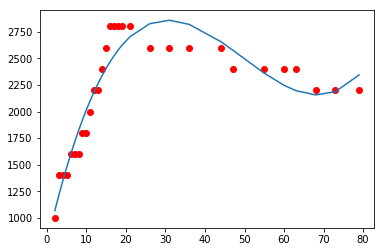

In [42]:
plt.scatter(X_male,male.calorie,color = 'red')
plt.plot(X_male,linearregmale.predict(Xmale_poly))

In [43]:
linearregfemale.fit(Xfemale_poly,female.calorie)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
linearregfemale.intercept_

1030.6164751963397

In [45]:
linearregfemale.coef_

array([  0.00000000e+00,   8.84775849e+01,  -2.06789215e+00,
         1.33144900e-02])

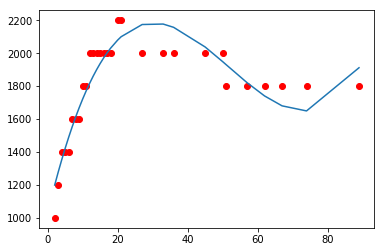

In [46]:
plt.scatter(X_female,female.calorie,color = 'red')
plt.plot(X_female,linearregfemale.predict(Xfemale_poly))

In [47]:
c = ([55],)
c = polyreg.fit_transform(c)

In [48]:
out = linearregmale.predict(c)
out[0]

2359.9279014435683

In [49]:
out = linearregfemale.predict(c)
out[0]

1856.7081745943528

In [27]:
i = int(input("Your Age "))
c = ([i],)
c = polyreg.fit_transform(c)
out = linearregmale.predict(c)
out[0]

Your Age 55


2359.9279014435683

In [135]:
i = int(input("Your Age "))
c = ([i],)
c = polyreg.fit_transform(c)
height = float(input("Height in feet "))
weight = float(input("Weight in kgs "))
h_value = (height*12*0.0254)
h_value = h_value*h_value
bmi = weight/h_value
out = linearregmale.predict(c)
print('Calorie Required is ',out[0])
print('Body Mass Index is ',bmi)
bmi_string = ''
if bmi<18.5:
    bmi_strint = 'You are Underweight'
    req_cal = out[0]+200
elif bmi>18.5 and bmi<24.9:
    bmi_string='You are Normal Weight'
    req_cal = out[0]
elif bmi>=25 and bmi<29.9:
    bmi_string = 'You are Over Weight'
    req_cal = out[0]-500
else:
    bmi_string = 'Obesity'
    req_cal = out[0]-1000
print(bmi_string)
print('So after bmi calculation Calorie Required is ',req_cal)

Your Age 55
Height in feet 5
Weight in kgs 70
Calorie Required is  2359.92790144
Body Mass Index is  30.13894916678722
Obesity
So after bmi calculation Calorie Required is  1359.92790144


In [136]:
breakfast_calorie = 20/100*req_cal
lunch_calorie = 40/100*req_cal
snack_calorie = 10/100*req_cal
dinner_calorie = 30/100*req_cal

In [137]:
print("Breakfast",breakfast_calorie,"calories")

Breakfast 271.985580289 calories


In [138]:
print("Lunch",lunch_calorie,"calories") 
print("Snack",snack_calorie,"calories")
print("Dinner",dinner_calorie,"calories")

Lunch 543.971160577 calories
Snack 135.992790144 calories
Dinner 407.978370433 calories


In [139]:
df_bf = pd.read_csv("Breakfast.csv")

In [140]:
type(df_bf)

pandas.core.frame.DataFrame

In [141]:
df_bf

,Food,Quantity,Calorie,Type
0,Whole Milk,1 glass,150,Protein
1,Cooked Cereal,1/2 cup,80,Carbohydrate
2,Chapatti,1,80,Carbohydrate
3,Rice Cooked,25 gm,80,Carbohydrate
4,Biscuit (Sweet),15 gms,70,Carbohydrate
5,Samosa,1 piece,140,Carbohydrate
6,Apple,1,59,Fiber
7,Banana,1,151,Fiber
8,Grapes,1,100,Fiber
9,Carrots,1,50,Fiber


In [142]:
b_carb = df_bf[df_bf.Type == 'Carbohydrate']
b_protein = df_bf[df_bf.Type == 'Protein']
b_fiber = df_bf[df_bf.Type == 'Fiber']

In [143]:
import random
listff = b_fiber.iloc[:,0].values
listcf = b_fiber.iloc[:,2].values
listfc = b_carb.iloc[:,0].values
listcc = b_carb.iloc[:,2].values
listfp = b_protein.iloc[:,0].values
listcp = b_protein.iloc[:,2].values

In [159]:
obtcal=0
sumcal = 0
listy=[]
while sumcal < breakfast_calorie: 
    ran_p = random.choice(listfp)
    ran_c = random.choice(listfc)
    ran_f = random.choice(listff)
    result_p = np.where(listfp == ran_p)
    result_c = np.where(listfc == ran_c)
    result_f = np.where(listff == ran_f)
    cp = listcp[result_p]
    cf = listcf[result_f]
    cc = listcc[result_c]
    sumca= int(cp[0])+int(cf[0])+int(cc[0])
    if sumca<(breakfast_calorie + 30):
        sumcal=sumca 
        if sumcal>breakfast_calorie:
            listy.append(ran_p)
            listy.append(ran_c)
            listy.append(ran_f)
obtcal=obtcal+sumcal
listy

['Whole Milk', 'Bread', 'Carrots']

In [160]:
df_lu = pd.read_csv("Lunch.csv")
df_lu

,food,quantity,calorie,type
0,Strawberry,1,53,Fruit
1,Broccoli,1,45,Vegetable
2,Broccoli,1,45,Vegetable
3,Carrots,1,50,Vegetable
4,Cucumber,1,17,Vegetable
5,Eggplant,1,35,Vegetable
6,Beef,1,142,Protein
7,Chicken,1,136,Protein
8,Tofu,1,86,Protein
9,Egg,1,78,Protein


In [161]:
l_carb = df_lu[df_lu.type == 'Carbohydrate']
l_protein = df_lu[df_lu.type == 'Protein']
l_drink = df_lu[df_lu.type == 'Drink']
l_veg = df_lu[df_lu.type == 'Vegetable']

In [162]:
list_l_df = l_drink.iloc[:,0].values
list_l_dc = l_drink.iloc[:,2].values
list_l_cf = l_carb.iloc[:,0].values
list_l_cc = l_carb.iloc[:,2].values
list_l_pf = l_protein.iloc[:,0].values
list_l_pc = l_protein.iloc[:,2].values
list_l_vf = l_veg.iloc[:,0].values
list_l_vc = l_veg.iloc[:,2].values

In [163]:
sumcal = 0
listl=[]
while sumcal < lunch_calorie: 
    ran_p = random.choice(list_l_pf)
    ran_c = random.choice(list_l_cf)
    ran_c2 = random.choice(list_l_cf)
    ran_d = random.choice(list_l_df)
    ran_v = random.choice(list_l_vf)
    result_p = np.where(list_l_pf == ran_p)
    result_c = np.where(list_l_cf == ran_c)
    result_c2 = np.where(list_l_cf == ran_c2)
    result_d = np.where(list_l_df == ran_d)
    result_v = np.where(list_l_vf == ran_v)
    cp = list_l_pc[result_p]
    cd = list_l_dc[result_d]
    cc = list_l_cc[result_c]
    cc2 = list_l_cc[result_c2]
    cv = list_l_vc[result_v]
    sumca= int(cp[0])+int(cd[0])+int(cc[0])+int(cv[0])+int(cc2[0])
    if sumca<(lunch_calorie+50):
        sumcal=sumca 
        if sumcal>lunch_calorie:
            listl.append(ran_p)
            listl.append(ran_c)
            listl.append(ran_d)
            listl.append(ran_v)                         
obtcal=obtcal+sumcal
listl

['Chicken', 'Roti', 'Dal', 'Cucumber']

In [164]:
df_sn = pd.read_csv("Snacks.csv")
df_sn

,food,quantity,calorie,type
0,Apple,1,59,Fiber
1,Almonds,1/4 cup,207,Protein
2,Boiled Eggs,1,78,Protein
3,Cheese,1,114,Protein
4,Carrot,1 cup,53,Fiber
5,Popcorn,1 cup,31,Protein
6,Pistachio,1/4 cup,171,Protein
7,Muffin,1,116,Protein
8,Banana,1,151,Fiber
9,Strawberry,1,50,Fiber


In [165]:
l_fiber = df_sn[df_sn.type == 'Fiber']
l_protein = df_sn[df_sn.type == 'Protein']

In [166]:
list_s_ff = l_fiber.iloc[:,0].values
list_s_fc = l_fiber.iloc[:,2].values
list_s_pf = l_protein.iloc[:,0].values
list_s_pc = l_protein.iloc[:,2].values

In [167]:
sumcal = 0
lists=[]
while sumcal < snack_calorie: 
    ran_p = random.choice(list_s_pf)
    ran_f = random.choice(list_s_ff)
    result_p = np.where(list_s_pf == ran_p)
    result_f = np.where(list_s_ff == ran_f)
    cp = list_s_pc[result_p]
    cf = list_s_fc[result_f]
    sumca= int(cp[0])+int(cf[0])
    if sumca<(snack_calorie + 20):
        sumcal=sumca 
        if sumcal>snack_calorie:
            lists.append(ran_p)
            lists.append(ran_f)
obtcal=obtcal+sumcal
lists

['Muffin', 'Tomato']

In [168]:
df_di = pd.read_csv("Dinner.csv")
df_di

,food,quantity,calorie,type
0,Mashed Potatoes,1 cup,235,Carbohydrate
1,Green Beans,1 cup,44,Vegetable
2,Corn,1 cup,120,Vegetable
3,Apple,1,80,Fruit
4,Avacado,1,320,Fruit
5,Banana,1,101,Fruit
6,Grape,1 cup,80,Fruit
7,Orange,1,70,Fruit
8,Strawberries,1,53,Fruit
9,Bean Sprouts,1 cup,37,Vegetable


In [169]:
s_carb = df_di[df_di.type == 'Carbohydrate']
s_protein = df_di[df_di.type == 'Protein']
s_drink = df_di[df_di.type == 'Drink']
s_veg = df_di[df_di.type == 'Vegetable']
s_fruit = df_di[df_di.type == 'Fruit']

list_s_df = s_drink.iloc[:,0].values
list_s_dc = s_drink.iloc[:,2].values
list_s_cf = s_carb.iloc[:,0].values
list_s_cc = s_carb.iloc[:,2].values
list_s_pf = s_protein.iloc[:,0].values
list_s_pc = s_protein.iloc[:,2].values
list_s_vf = s_veg.iloc[:,0].values
list_s_vc = s_veg.iloc[:,2].values
list_s_ff = s_fruit.iloc[:,0].values
list_s_fc = s_fruit.iloc[:,2].values

In [170]:
sumcal = 0
listd=[]
while sumcal < dinner_calorie: 
    ran_p = random.choice(list_s_pf)
    ran_c = random.choice(list_s_cf)
    ran_d = random.choice(list_s_df)
    ran_v = random.choice(list_s_vf)
    ran_f = random.choice(list_s_ff)
    result_p = np.where(list_s_pf == ran_p)
    result_c = np.where(list_s_cf == ran_c)
    result_d = np.where(list_s_df == ran_d)
    result_v = np.where(list_s_vf == ran_v)
    result_f = np.where(list_s_ff == ran_f)
    cp = list_s_pc[result_p]
    cd = list_s_dc[result_d]
    cc = list_s_cc[result_c]
    cv = list_s_vc[result_v]
    cf = list_s_fc[result_f]
    sumca= int(cp[0])+int(cd[0])+int(cc[0]+int(cv[0])+int(cf[0]))
    if sumca<(dinner_calorie + 20):
        sumcal=sumca 
        if sumcal>dinner_calorie:
            listd.append(ran_p)
            listd.append(ran_c)
            listd.append(ran_d)
            listd.append(ran_v)
            listd.append(ran_f)
obtcal=obtcal+sumcal
listd

['Egg', 'Roti', 'Milk (Whole)', 'Broccoli', 'Apple']

In [171]:
print('Here Are Your Results')
print('Age ',i)
print('Height',height)
print('Weight',weight)
print(bmi_string)
print('')
print('Our Sugession')
print('')
print ('Breakfast')
print (listy[0])
print (listy[1])
print (listy[2])
print('')
print ('Lunch')
print (listl[0])
print (listl[1])
print (listl[2])
print(listl[3])
print('')
print ('Snack')
print (lists[0])
print (lists[1])
print('')
print ('Dinner')
print (listd[0])
print (listd[1])
print (listd[2])
print(listd[3])
print('')
print ('Required Calorie',req_cal)
print ('Total Calorie',obtcal)

Here Are Your Results
Age  55
Height 5.0
Weight 70.0
Obesity

Our Sugession

Breakfast
Whole Milk
Bread
Carrots

Lunch
Chicken
Roti
Dal
Cucumber

Snack
Muffin
Tomato

Dinner
Egg
Roti
Milk (Whole)
Broccoli

Required Calorie 1359.92790144
Total Calorie 1430
